## Campo eléctrico - Melanie Andrea Munoz Chavarria

1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio
elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

- a. Encontrar el campo en un punto producido por dos cargas q1 y q2
- b. Emplee el comando  plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
- c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array.

Este programa calcula el campo eléctrico de un dipol, definido por:
\begin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###El campo eleéctrico en un punto, para dos cargas q1 y q2.

A partir de la ecuación:

$\vec{E}= \frac{1}{4 \pi \epsilon_{0}} \frac{q}{r^2} \hat{\Delta{r}}$


Haciendo la resta respectiva entre los vectores posición de las párticulas cargadas ( $\vec{r_1}$ y $\vec{r_2}$) y el punto donde se desea calcular el campo ($\vec{r_p}$). Se hace una resta tal que:
$\vec{\Delta{r}}= \vec{r_p} - \vec{r_i}$

Luego normalizando este vector, se multiplica por la magnitud del campo, es decir $E=\frac{1}{4 \pi \epsilon_{0}} \frac{q}{r^2} $. Obtienndo así un vector co las componentes Ex y Ey del campo.  





In [ ]:
#Posición particula positiva
x1=-1
y1= 0

#Posición punto
xp=0
yp=1

#Posición carga negativo
x2=1
y2=0
#Valores Cargas
q1=(1*10**(9)) #Con este valor para cancelar la potencia negativa de la constante de Coulomb, note que la carga tiene unidades de  nC
q2=(-q1)

#Vector posición a la carga positiva
r1=np.array([x1,y1])

#Vector posición del punto
rp=np.array([xp,yp])

#Vector posición a la carga negativa
r2=np.array([x2,y2])


#Campo para la carga positiva
k=9*10**(-9)
delta_q1=rp-r1
magnitud_delta_q1=np.linalg.norm(delta_q1) #Norma
unitario_q1=(1/magnitud_delta_q1)*(delta_q1) #Unitario
magnitud_campo_q1= k*(q1/(magnitud_delta_q1)**2) #Magnitud campo
campo_q1=(magnitud_campo_q1)*(unitario_q1) #Componentes x, y del campo
print(f'Campo carga positiva {campo_q1} [N/C]')

#Campo para la carga negativa
delta_q2=rp-r2
magnitud_delta_q2=np.linalg.norm(delta_q2)
unitario_q2=(1/magnitud_delta_q2)*(delta_q2)
magnitud_campo_q2=k*(q2/(magnitud_delta_q2)**2)
campo_q2=(magnitud_campo_q2)*(unitario_q2)
print(f'Campo carga negativa {campo_q2} [N/C]')


Campo carga positiva [3.18198052 3.18198052] [N/C]
Campo carga negativa [ 3.18198052 -3.18198052] [N/C]


###Función campo eléctrico

Tomando el mismo desarollo para el campo eléctrico generado por dos cargas en un punto fijo. Se toma la magtitud del campo, multiplicandola por el vector unitario, con una función con paramétros para la carga, la posición del punto (xp,yp) y la posición de la particula (xi,yi)

In [ ]:
def campo_electrico(carga,x_punto,y_punto,x_carga,y_carga):
  r1=np.array([x_carga,y_carga])
  rp=np.array([x_punto,y_punto])
  delta_carga=rp-r1
  magnitud_delta_carga=np.linalg.norm(delta_carga)
  unitario_carga=(1/magnitud_delta_carga)*(delta_carga)
  magnitud_campo_carga= k*(carga/(magnitud_delta_carga)**2)
  campo_carga=(magnitud_campo_carga)*(unitario_carga)
  return campo_carga

campo_electrico(4,3,7,-1,0)

array([2.74784643e-10, 4.80873125e-10])

###Campo producido
Para el primer caso, tomando tres puntos, se hace un uso sencillo de plt.quiver()
Para el caso, generalizado, con la ayuda de una iteración primero sobre "xp" y luego sobre "yp" (las coordenadas del punto donde se desea calcular el campo), Con la ayuda de np.arange(), dandole un valor inicial y final, en intervalos de 1. Se uso nuevamente la función plt.quiver()

En ambos casos, lo que se hace para obtener el campo es usar la función campo_electrico y dándole ciertos valores, para luego guardarlos en variables E1 (campo negativo) y E2 (campo positivo) y después E=E1+E2

[3.18198052 3.18198052]
[ 3.18198052 -3.18198052]
[6.36396103 0.        ]


Text(0, 0.5, 'y')

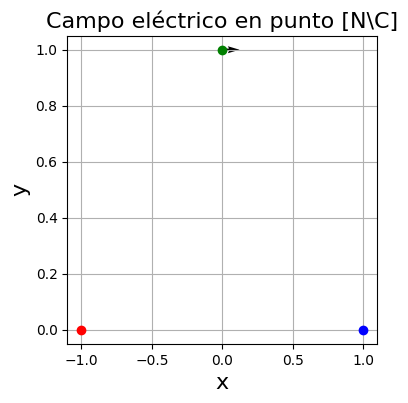

In [ ]:
#Campo del dipolo
E1= campo_electrico(q1,xp,yp,x1,y1) #Campo carga negativa
print(E1)
E2=campo_electrico(q2,xp,yp,x2,y2) #Campo carga positiva
print(E2)
E=E1+E2
print(E)
#Figura para 2 cargas y una carga de prueba
plt.figure(figsize=(4,4))
plt.plot(x1,y1,'ro')
plt.plot(x2,y2,'bo')
plt.plot(xp,yp,'go')
plt.quiver(xp,yp,E[0],E[1])
plt.grid()
plt.title('Campo eléctrico en punto [N\C]',fontsize=16)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)



<ipython-input-4-0a2e6612d283>:6: RuntimeWarning: divide by zero encountered in double_scalars
  unitario_carga=(1/magnitud_delta_carga)*(delta_carga)
<ipython-input-4-0a2e6612d283>:6: RuntimeWarning: invalid value encountered in multiply
  unitario_carga=(1/magnitud_delta_carga)*(delta_carga)
<ipython-input-4-0a2e6612d283>:7: RuntimeWarning: divide by zero encountered in double_scalars
  magnitud_campo_carga= k*(carga/(magnitud_delta_carga)**2)
/usr/local/lib/python3.10/dist-packages/matplotlib/quiver.py:628: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


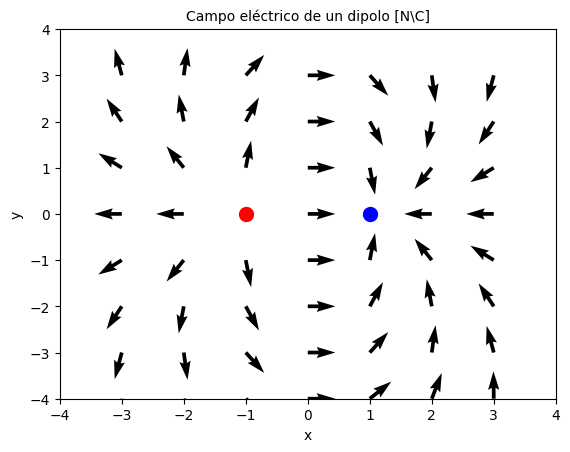

In [ ]:
#Intervalos y salto, para el valor rp
componente_x=np.arange(-4,4,1)
componente_y=np.arange(-4,4,1)

#Iteración para recorrer los intervalos
for x in componente_x:
  for y in componente_y:
    E1= campo_electrico(q1,x,y,x1,y1) #Campo carga negativa
    E2=campo_electrico(q2,x,y,x2,y2) #Campo carga positiva
    E=E1+E2

    plt.quiver(x,y,E[0],E[1])
#Figura
plt.plot(x1,y1,'ro',markersize=10)
plt.plot(x2,y2,'bo', markersize= 10)
plt.title('Campo eléctrico de un dipolo [N\C]',fontsize=10)
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()



###Generalización


In [ ]:
1#Datos
q1=int(input('Ingrese el valor de la carga positiva en Coulombs'))
q2=-q1
x1=int(input('Ingrese la posición en x de la partícula positiva'))
y1=int(input('Ingrese la posición en y de la partícula positiva'))
x2=int(input('Ingrese la posición en x de la partícula negativa'))
y2=int(input('Ingrese la posición en y de la partícula negativa'))
inicio_x=int(input('Ingrese el valor límite inicial de x'))
final_x=int(input('Ingrese el valor de límite final de x'))
salto_x=int(input('ingrese el valor del salto para x'))
inicio_y=int(input('Ingrese el valor límite inicial de y'))
final_y=int(input('Ingrese el valor de límite final de y'))
salto_y=int(input('ingrese el valor del salto para y'))

componente_x=np.arange(inicio_x,final_x,salto_x)
componente_y=np.arange(inicio_y,final_y,salto_y)
for x in componente_x:
  for y in componente_y:
    E1= campo_electrico(q1,x,y,x1,y1) #Campo carga negativa
    E2=campo_electrico(q2,x,y,x2,y2) #Campo carga positiva
    E=E1+E2
    print((x,y),E[0],E[1])



Ingrese el valor de la carga positiva en Coulombs1
Ingrese la posición en x de la partícula positiva-1
Ingrese la posición en y de la partícula positiva0
Ingrese la posición en x de la partícula negativa1
Ingrese la posición en y de la partícula negativa0
Ingrese el valor límite inicial de x-4
Ingrese el valor de límite final de x4
ingrese el valor del salto para x1
Ingrese el valor límite inicial de y-4
Ingrese el valor de límite final de y4
ingrese el valor del salto para y1
(-4, -4) -4.458977353689581e-11 -1.5087181882951664e-10
(-4, -3) -1.2656996908112983e-10 -2.1736333768598744e-10
(-4, -2) -2.8788688060637104e-10 -2.687640373510734e-10
(-4, -1) -5.143831958909129e-10 -2.1671863494424425e-10
(-4, 0) -6.400000000000001e-10 0.0
(-4, 1) -5.143831958909129e-10 2.1671863494424425e-10
(-4, 2) -2.8788688060637104e-10 2.687640373510734e-10
(-4, 3) -1.2656996908112983e-10 2.1736333768598744e-10
(-3, -4) -2.3723357662645744e-12 -2.0361845374124562e-10
(-3, -3) -9.602321277131254e-11 -3.600

<ipython-input-4-0a2e6612d283>:6: RuntimeWarning: divide by zero encountered in double_scalars
  unitario_carga=(1/magnitud_delta_carga)*(delta_carga)
<ipython-input-4-0a2e6612d283>:6: RuntimeWarning: invalid value encountered in multiply
  unitario_carga=(1/magnitud_delta_carga)*(delta_carga)
<ipython-input-4-0a2e6612d283>:7: RuntimeWarning: divide by zero encountered in double_scalars
  magnitud_campo_carga= k*(carga/(magnitud_delta_carga)**2)
